# 데이터 불러오기, 데이터 확인

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 데이터 불러오기
data = pd.read_csv('../../../data/trip.csv')

In [3]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [4]:
# 컬럼명 밑 자료형 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [5]:
# 컬럼별 통계량 확인
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


# 중복 데이터 확인

In [6]:
# 중복 데이터 확인
data[data.duplicated()]


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [7]:
# 중복된 승객명을 입력
data[data['passenger_name'] == 'Sarah Gross']


,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [8]:
# 중복 데이터 제거
data = data.drop_duplicates()

In [9]:
# 중복 제거 확인
data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


# 결측치 확인

In [10]:
# 결측치 확인
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [11]:
# 결측치의 비율 확인
data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [12]:
# 결측치 제거
data['fare_amount'] = data['fare_amount'].fillna(data['fare_amount'].median())

In [13]:
# 결측 제거 확인
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

# 수치형 컬럼의 이상치 제거

## passenger_count 컬럼의 이상치 제거

In [14]:
# passenger_count 컬럼의 값을 기준으로 정렬
data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
13718     0
5670      0
         ..
21791     6
15629     6
4854      6
0         6
64       36
Name: passenger_count, Length: 22699, dtype: int64

<AxesSubplot:ylabel='passenger_count'>

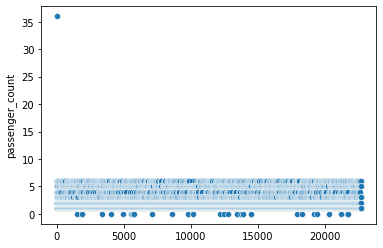

In [15]:
# passenger_count 값의 scatter plot을 그린다.
sns.scatterplot(x = data.index, y = data['passenger_count'])

In [16]:
# passenger_count 컬럼의 이상치 제거 ( 값이 6을 초과하는 경우)
data = data[data['passenger_count'] <= 6]

In [17]:
# 다른 이상치 갯수 확인 ( '0'인 경우)
len(data[data['passenger_count'] == 0])


33

In [18]:
# '0'인경우의 이상치 제거
data = data[data['passenger_count']  != 0]

<AxesSubplot:ylabel='passenger_count'>

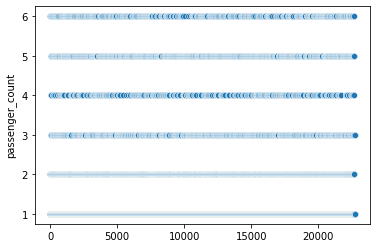

In [19]:
# passenger_count의 scatter plot을 다시그려서 이상치 제거 확인하기
sns.scatterplot(x = data.index, y = data['passenger_count'])

## trip_distance 컬럼의 이상치 제거

In [20]:
#trip_distance의 이상치 확인
data['trip_distance'].sort_values()
# trip_distance가 '0'인 경우는 이상치로 판단. 갯수확인
len(data[data['trip_distance'] == 0])

147

In [21]:
# trip_distance의 이상치 제거
data = data[data['trip_distance'] != 0]

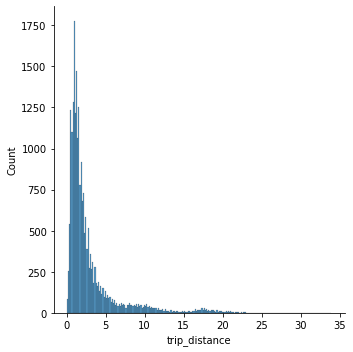

In [22]:
# trip_distance의 히스토그램 그리기
sns.displot(data['trip_distance'])

In [23]:
# trip_distance의 최소값이 '0'이 아님을 확인
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22518.000000,22518.000000,22518.000000,22518.000000,22518.000000
mean,1.645972,2.933012,12.957594,1.829935,0.309839
std,1.285744,3.658982,12.701016,2.767513,1.387686
min,1.000000,0.010000,-120.000000,0.000000,0.000000
25%,1.000000,1.000000,6.500000,0.000000,0.000000
50%,1.000000,1.630000,9.500000,1.360000,0.000000
75%,2.000000,3.090000,14.500000,2.450000,0.000000
max,6.000000,33.960000,999.990000,200.000000,19.100000


## fare_amount 컬럼의 이상치 제거

In [24]:
# fare_amoount의 이상치 데이터 갯수 확인 (0이하인 경우)
len(data[data['fare_amount'] <= 0])

16

In [25]:
# fare_amount의 이상치 제거
data = data[data['fare_amount'] > 0]

In [26]:
# fare_amount 기준으로 정렬
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
21595,Timothy Ramirez,04/14/2017 9:18:30 PM,04/14/2017 9:18:32 PM,Credit Card,1,1.20,2.50,0.00,0.00
9190,Valerie Vasquez,03/31/2017 5:29:19 AM,03/31/2017 5:29:32 AM,Cash,1,0.01,2.50,0.00,0.00
5680,Brittany Morris,06/11/2017 4:31:36 AM,06/11/2017 4:31:51 AM,Cash,1,1.50,2.50,0.00,0.00
3736,Jennifer Caldwell,02/20/2017 4:58:03 PM,02/20/2017 4:58:15 PM,Cash,1,0.60,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


<AxesSubplot:ylabel='fare_amount'>

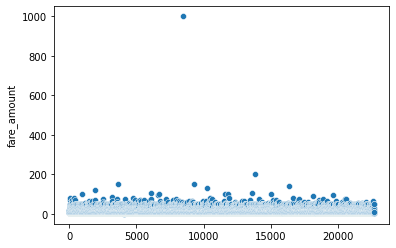

In [27]:
# fare_amount의 scatter plot 그리기
sns.scatterplot(x = data.index, y = data['fare_amount'])

In [28]:
# fare amount가 가장 큰 값 10개 확인
data['fare_amount'].sort_values().tail(10)

910      100.00
13623    105.00
6066     107.00
1930     120.00
10293    131.00
16381    140.00
9282     150.00
3584     152.00
13863    200.01
8478     999.99
Name: fare_amount, dtype: float64

In [29]:
# fare_amount가 300이상 제거
data = data[data['fare_amount'] < 300]

In [30]:
# 제거 확인
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
15348,Michael Ferguson,01/17/2017 1:18:24 PM,01/17/2017 1:18:31 PM,Debit Card,1,0.02,2.50,0.00,0.00
5680,Brittany Morris,06/11/2017 4:31:36 AM,06/11/2017 4:31:51 AM,Cash,1,1.50,2.50,0.00,0.00
19030,Jack Dunn,05/26/2017 1:37:58 AM,05/26/2017 1:38:11 AM,Credit Card,1,6.20,2.50,10.00,0.00
9190,Valerie Vasquez,03/31/2017 5:29:19 AM,03/31/2017 5:29:32 AM,Cash,1,0.01,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00


In [31]:
# fare_amount가 150을 초과한다면, 150으로 변환
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [32]:
# 변환 확인
data['fare_amount'].sort_values().tail(10)

910      100.0
14997    100.0
13623    105.0
6066     107.0
1930     120.0
10293    131.0
16381    140.0
9282     150.0
3584     150.0
13863    150.0
Name: fare_amount, dtype: float64

## tip_amount 컬럼의 이상치 제거


<AxesSubplot:ylabel='tip_amount'>

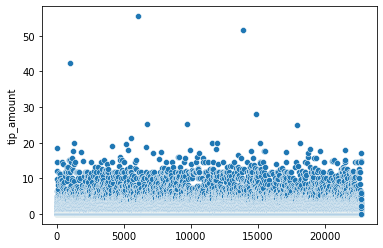

In [33]:
# tip_amount의 이상치 확인
sns.scatterplot(x = data.index, y = data['tip_amount'])

In [34]:
# tip_amount 이상치 제거
data = data[data['tip_amount'] < 40]

In [35]:
# 제거 확인
data.sort_values('tip_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
20537,David Cochran,03/19/2017 1:22:32 PM,03/19/2017 1:40:09 PM,Cash,3,2.60,13.0,0.0,0.00
20197,Earl Smith,09/23/2017 9:29:03 PM,09/23/2017 9:39:21 PM,Cash,1,0.60,7.5,0.0,0.00
7017,James Miller,03/27/2017 10:11:24 PM,03/27/2017 10:16:29 PM,Credit Card,1,0.92,5.5,0.0,0.00
20196,Alex Williams,01/09/2017 11:30:21 AM,01/09/2017 11:39:36 AM,Credit Card,6,0.96,7.5,0.0,0.00
20195,Joan Bowen,09/10/2017 7:56:03 AM,09/10/2017 8:05:53 AM,Credit Card,2,2.27,10.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...
5538,Alexander Giles Jr.,03/16/2017 12:14:51 PM,03/16/2017 12:52:36 PM,Cash,1,17.50,69.5,21.3,15.50
17936,Jenna Reynolds,05/27/2017 12:14:08 AM,05/27/2017 12:55:25 AM,Cash,2,6.80,29.5,25.0,0.00
9716,Miss Karen Smith,09/28/2017 11:56:23 AM,09/28/2017 12:21:12 PM,Cash,1,10.02,30.0,25.2,5.76
6710,Nicholas Charles,10/30/2017 11:23:46 AM,10/30/2017 11:23:49 AM,Credit Card,1,0.32,100.0,25.2,0.00


## toll_amount, outlier 없음

# 범주형 데이터 전처리

## 결제 방법: Debit Card와 Credit Card를 Card로 통합

In [36]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [37]:
data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [38]:
# 칼럼에서 unique한 데이터 개수
data['payment_method'].nunique()

3

In [39]:
data['payment_method'].value_counts()

Cash           11096
Debit Card      5730
Credit Card     5672
Name: payment_method, dtype: int64

In [40]:
# 'Debit Card'와 'Credit Card' 항목을 'Card'로 변환합니다.
data['payment_method'] = data['payment_method'].replace({'Debit Card': 'Card', 'Credit Card' : 'Card'})

In [41]:
# Card로 바뀌었는지 확인
data['payment_method'].value_counts()

Card    11402
Cash    11096
Name: payment_method, dtype: int64

## 승객명 : 성과 이름을 분리하여 성 부분만 저장

In [42]:
#passenger_name을 성과 이름으로 분리하여 성 부분만 passenger_first_name 컬럼으로 저장
data['passenger_first_name'] = data['passenger_name'].str.split(expand=True)[0]

In [43]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna


## 택시 탑승, 하차 시간 활용

In [44]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22498 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22498 non-null  object 
 1   tpep_pickup_datetime   22498 non-null  object 
 2   tpep_dropoff_datetime  22498 non-null  object 
 3   payment_method         22498 non-null  object 
 4   passenger_count        22498 non-null  int64  
 5   trip_distance          22498 non-null  float64
 6   fare_amount            22498 non-null  float64
 7   tip_amount             22498 non-null  float64
 8   tolls_amount           22498 non-null  float64
 9   passenger_first_name   22498 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.9+ MB


In [46]:
# tpep_pickup_datetime 컬럼의 object 자료형을 datetime으로 변환
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [47]:
# tpep_dropoff_datetime 컬럼의 object 자료형을 datetime으로 변환
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [48]:
# 변환 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22498 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   passenger_name         22498 non-null  object        
 1   tpep_pickup_datetime   22498 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  22498 non-null  datetime64[ns]
 3   payment_method         22498 non-null  object        
 4   passenger_count        22498 non-null  int64         
 5   trip_distance          22498 non-null  float64       
 6   fare_amount            22498 non-null  float64       
 7   tip_amount             22498 non-null  float64       
 8   tolls_amount           22498 non-null  float64       
 9   passenger_first_name   22498 non-null  object        
dtypes: datetime64[ns](2), float64(4), int64(1), object(3)
memory usage: 1.9+ MB


In [49]:
# 하차시각과 승차시각의 차이를 travel_time 칼럼으로 저장
data['travel_time'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']

In [50]:
# 저장확인
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,0 days 00:14:04
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,0 days 00:26:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,0 days 00:07:12
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,0 days 00:30:15
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,0 days 00:16:43


In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22498 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22498 non-null  object         
 1   tpep_pickup_datetime   22498 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22498 non-null  datetime64[ns] 
 3   payment_method         22498 non-null  object         
 4   passenger_count        22498 non-null  int64          
 5   trip_distance          22498 non-null  float64        
 6   fare_amount            22498 non-null  float64        
 7   tip_amount             22498 non-null  float64        
 8   tolls_amount           22498 non-null  float64        
 9   passenger_first_name   22498 non-null  object         
 10  travel_time            22498 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.1+ MB


In [52]:
# trave_time 컬럼을 초단위로 변경
data['travel_time'] = data['travel_time'].dt.seconds

In [53]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,844
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,1003


## feature engineering 맛보기

In [54]:
# 승객이 지불한 총 요금을 total_amount 칼럼으로 저장
data['total_amount'] = data['fare_amount'] + data['tip_amount'] + data['tolls_amount']

<AxesSubplot:xlabel='trip_distance', ylabel='fare_amount'>

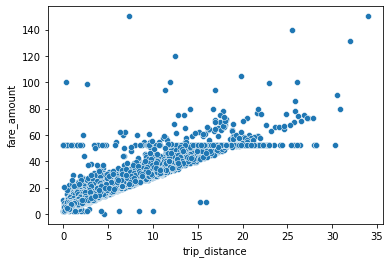

In [55]:
# fare_amount와 trip_distance 사이의 관계를 scatter plot으로 표현
sns.scatterplot(x = data['trip_distance'], y = data['fare_amount'] )

<AxesSubplot:xlabel='travel_time', ylabel='fare_amount'>

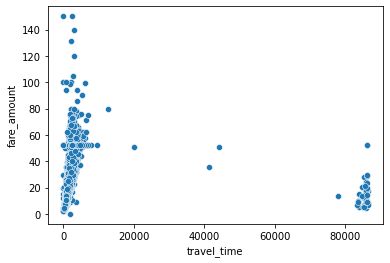

In [56]:
# fare_amount와 travel_time 사이의 관계를 scatter plot으로 표현
sns.scatterplot(x = data['travel_time'], y = data['fare_amount'] )

<AxesSubplot:xlabel='travel_time', ylabel='trip_distance'>

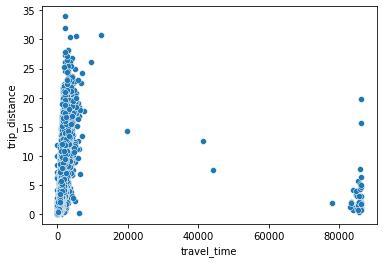

In [57]:
# trip_distance와 travel_time 사이의 관계를 scatter plot으로 표현
sns.scatterplot(x = data['travel_time'], y = data['trip_distance'] )

In [58]:
data[data['travel_time'] > 60000]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
699,Scott Garcia,2017-06-10 21:55:01,2017-06-11 21:45:51,Card,1,1.36,8.5,1.47,0.00,Scott,85850,9.97
926,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.00,Michael,86373,17.50
1012,James Anderson,2017-12-08 07:17:20,2017-12-09 07:07:22,Cash,1,0.33,4.5,0.00,0.00,James,85802,4.50
1201,Carla Allen,2017-11-12 19:52:44,2017-11-13 19:37:35,Card,1,4.14,18.0,3.76,0.00,Carla,85491,21.76
1357,Jamie Collins,2017-04-17 21:26:49,2017-04-18 20:46:13,Cash,6,4.09,15.0,0.00,0.00,Jamie,83964,15.00
1760,Ronald Kidd,2017-12-28 23:58:24,2017-12-29 23:38:45,Cash,1,1.23,7.0,1.66,0.00,Ronald,85221,8.66
4602,Brandon Miller,2017-12-20 08:24:34,2017-12-21 07:39:27,Cash,4,1.26,10.0,0.00,0.00,Brandon,83693,10.00
5372,Catherine Ray,2017-12-13 19:40:05,2017-12-14 19:31:09,Cash,3,0.93,12.0,2.07,0.00,Catherine,85864,14.07
5480,Patricia Galvan,2017-09-19 13:16:13,2017-09-20 12:36:12,Card,1,0.62,5.5,0.00,0.00,Patricia,83999,5.50
6495,Travis Tucker,2017-06-27 16:52:07,2017-06-28 16:49:57,Cash,1,15.60,52.0,0.00,0.00,Travis,86270,52.00


In [59]:
# 60000초 이상인데 거리는 별로 안멀다. 제자리에서 도는 루트가 아닌이상 이상함.
# outlier로 보고 이상치 제거를 해주는게 좋을거같다.
len(data[data['travel_time'] > 60000])

42

In [60]:
# scatter plot으로 관찰된 travel_time의 이상치를 제거
data = data[data['travel_time'] < 60000] 

In [61]:
# 제거 확인
len(data[data['travel_time'] > 60000])

0